In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, color , img_as_float , data

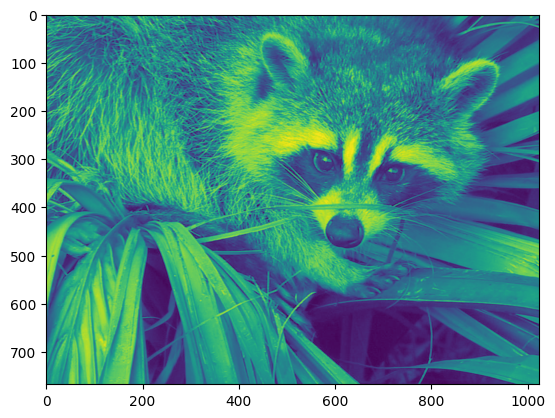

In [3]:
img = io.imread('raccoon.png', as_gray=True)
plt.imshow(img)
plt.show()

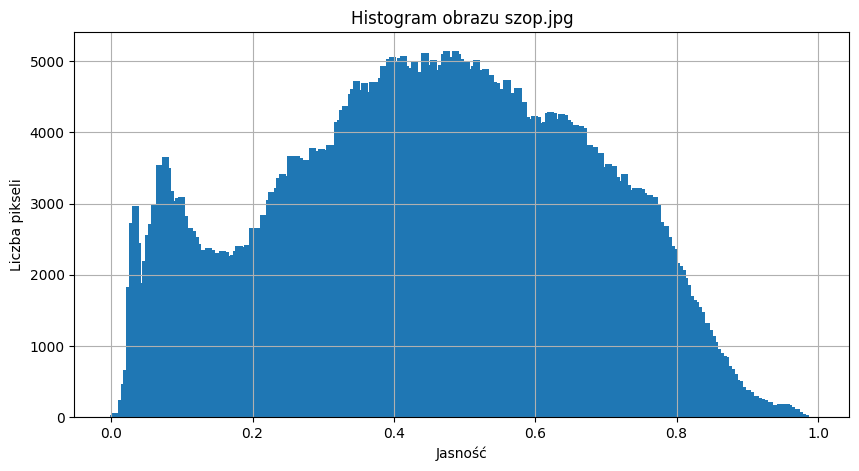

In [4]:
hist, bin_centers = exposure.histogram(img)
# Отображение
plt.figure(figsize=(10, 5))
plt.bar(bin_centers, hist, width=0.01)
plt.title("Histogram obrazu szop.jpg")
plt.xlabel("Jasność")
plt.ylabel("Liczba pikseli")
plt.grid(True)
plt.savefig("szop_histogram.png", bbox_inches='tight')
plt.show()

Lewу szczyt na histogramie to po prostu najciemniejsze piksele w obrazie – czyli wszystkie obszary głębokiego cienia i ciemnego futra szopa. W praktyce będą to:

„Maska” wokół oczu (ciemne paski futra),

Nos i okolice pyska,

Głębokie cienie wśród liści i pod ciałem zwierzaka.

In [5]:
jasnosc_min = np.min(bin_centers)
jasnosc_max = np.max(bin_centers)

print(f"Minimalna wartość jasności: {jasnosc_min}")
print(f"Maksymalna wartość jasności: {jasnosc_max}")

Minimalna wartość jasności: 0.0027683923100490196
Maksymalna wartość jasności: 0.989648470435049


In [6]:
def min_max(x):
    jasnosc_min = np.min(x)
    jasnosc_max = np.max(x)
    print(f"Minimalna wartość jasności: {jasnosc_min}")
    print(f"Maksymalna wartość jasności: {jasnosc_max}")
    return

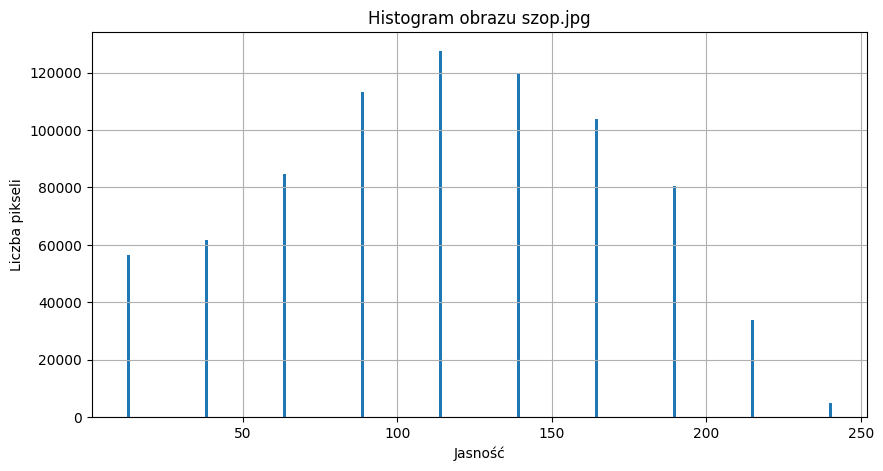

Minimalna wartość jasności: 12.844565
Maksymalna wartość jasności: 240.22173500000002


In [22]:
img_float = 255 * img_as_float(img)   #img_as_float(img) nie potrzeb bo fun as_gray wraca float64 normalizowany do 0-1 
hist2, bin2  = exposure.histogram(img_float, nbins=10 )
plt.figure(figsize=(10, 5))
plt.bar(bin2, hist2)
plt.title("Histogram obrazu szop.jpg")
plt.xlabel("Jasność")
plt.ylabel("Liczba pikseli")
plt.grid(True)
plt.savefig("szop_histogram_ibs10.png", bbox_inches='tight')
plt.show()
min_max(bin2)

Pytanie 2 

Przyjmując zaokrąglenie wartości minimalnej i maksymalnej jako min = 13 i max = 240 możemy wyliczyć że każdy przediał ma szerokość 22,7. Pierwszy przedział obejmuje wartości jasności z zakresu <13, 36>

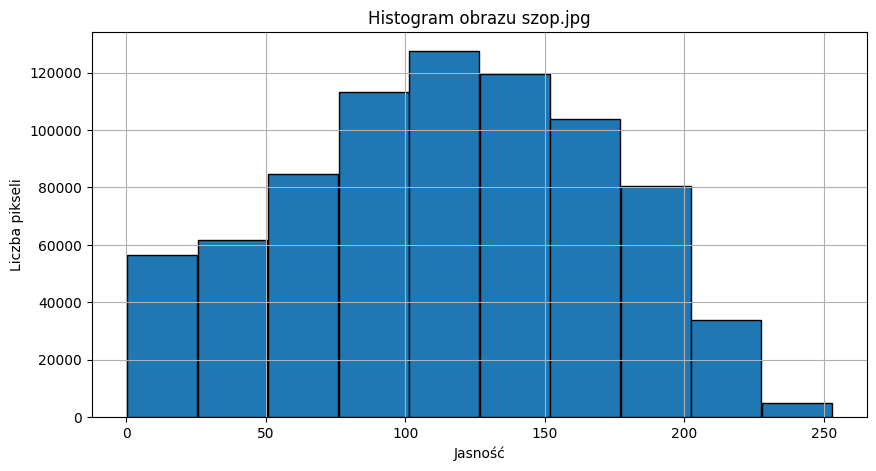

Minimalna wartość jasności: 12.844565
Maksymalna wartość jasności: 240.22173500000002


In [8]:
hist2, bin2  = exposure.histogram(img_float, nbins=10 )
plt.figure(figsize=(10, 5))
plt.bar(bin2, hist2,width=25,edgecolor='black' )
plt.title("Histogram obrazu szop.jpg")
plt.xlabel("Jasność")
plt.ylabel("Liczba pikseli")
plt.grid(True)
plt.savefig("szop_histogram_w.png", bbox_inches='tight')
plt.show()
min_max(bin2)

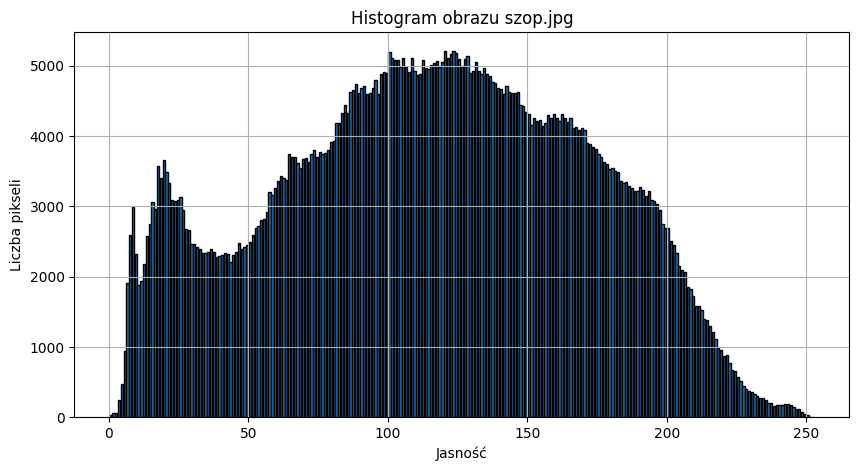

Minimalna wartość jasności: 0.7117911067193675
Maksymalna wartość jasności: 252.35450889328064


In [ ]:
hist3, bin3  = exposure.histogram(img_float, nbins=253 )
plt.figure(figsize=(10, 5))
plt.bar(bin3, hist3,width=0.8,edgecolor='black' )
plt.title("Histogram obrazu szop.jpg")
plt.xlabel("Jasność")
plt.ylabel("Liczba pikseli")
plt.grid(True)
plt.savefig("szop_histogram_w.png", bbox_inches='tight')
plt.show()
min_max(bin3)


Text(0, 0.5, 'Liczba pikseli')

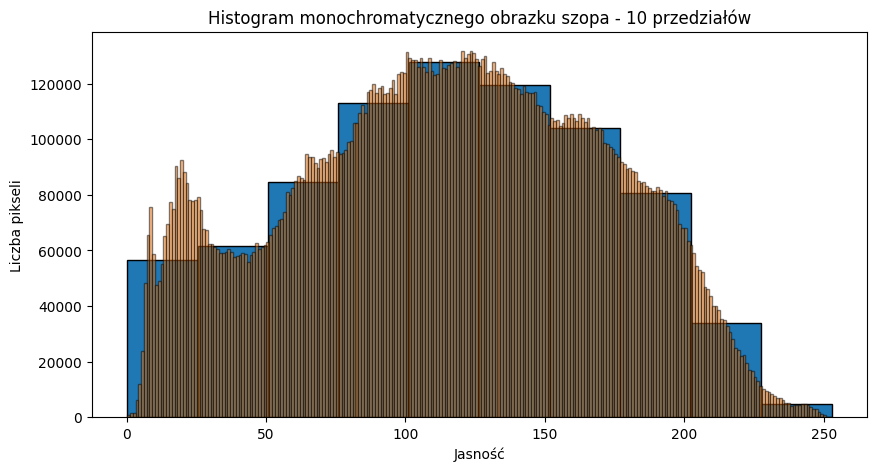

In [27]:
k='black'
plt.figure(figsize=(10, 5))
plt.bar(bin2, hist2, width = 253/10, edgecolor = 'k') 
plt.bar(bin3, hist3*25.3, width = 1, edgecolor = 'k', alpha=0.5) 
plt.title('Histogram monochromatycznego obrazku szopa - 10 przedziałów')
plt.xlabel('Jasność')
plt.ylabel('Liczba pikseli')

Pytanie 3 

Histogram o większej liczbie przedziałów 253 ma węższe przedziały, więc każdy słupek reprezentuje mniejszą liczbę pikseli.
Aby porównać go z histogramem 10 przedziałowym, należy znormalizować wysokość słupków, co oznacza przemnożenie go przez stosunek liczby przedziałów. Dzięki temu wartości są przeliczone na równoważną reprezentację liczby pikseli, co pozwala na uczciwe porównanie.

Punkt 4

Histogram z dużą liczbą przedziałów jest bardziej szczegółowy, pokazuje dokładne rozłożenie jasności. Histogram z małą liczbą przedziałów jest bardziej ogólny, wygładzony, ale ukrywa szczegóły obrazu.

Text(0, 0.5, 'Liczba pikseli')

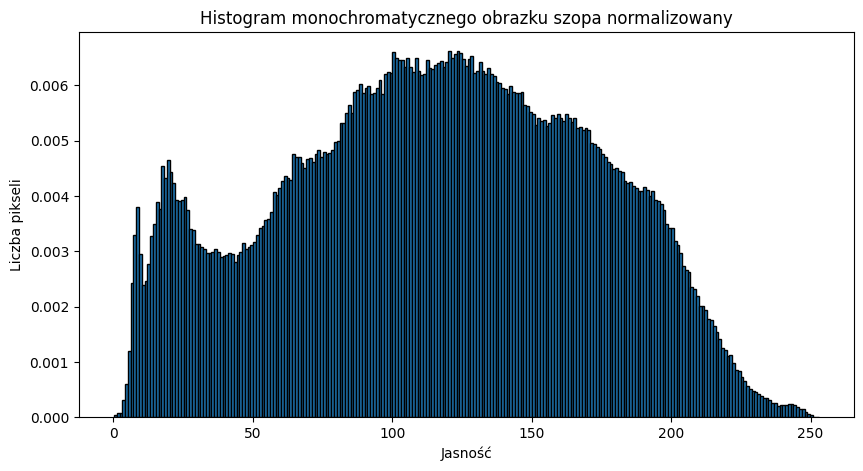

In [11]:
hist_norm = hist3 / hist3.sum()
plt.figure(figsize=(10,5))
plt.bar(bin3, hist_norm, width = 1, edgecolor = 'k') 
plt.title('Histogram monochromatycznego obrazku szopa normalizowany')
plt.xlabel('Jasność')
plt.ylabel('Liczba pikseli')

Pytanie 5 

Znormalizowany histogram jest funkcją gęstości prawdopodobieństwa 

In [12]:
szop_orig=io.imread('raccoon.png', as_gray=True )
szop_kont=io.imread('raccoon_contrast.png', as_gray=True )
szop_orig255=szop_orig*255
szop_kont255=szop_kont*255
#gray_u8o = util.img_as_ubyte(szop_orig)
#gray_u8k = util.img_as_ubyte(szop_kont)

In [13]:
hist_o,bins_o=exposure.histogram(szop_orig255, nbins=253)
hist_k , bins_k=exposure.histogram(szop_kont255, nbins=253)

Text(0, 0.5, 'Liczba pikseli')

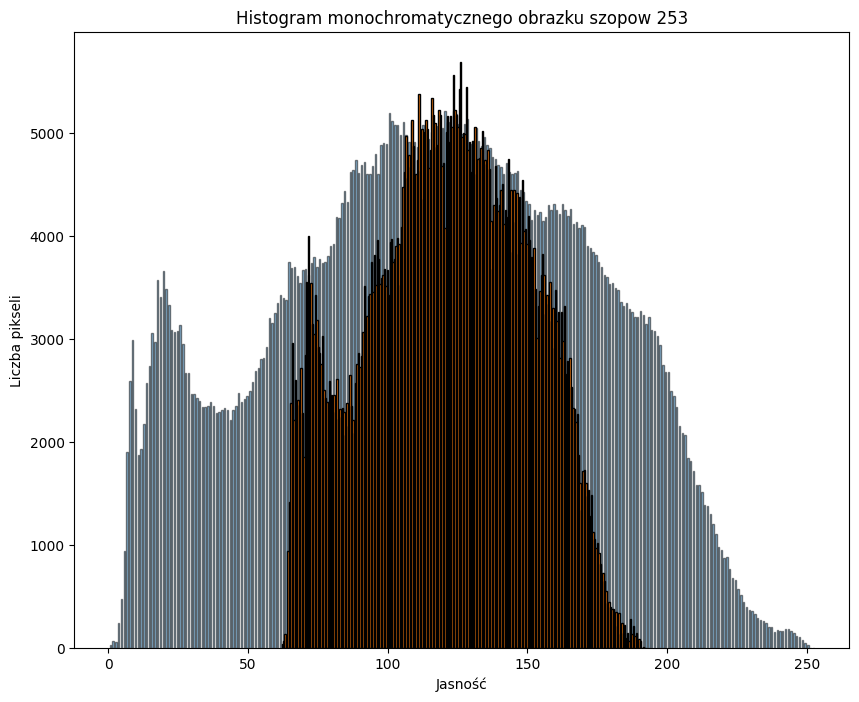

In [14]:
plt.figure(figsize=(10,8))
plt.bar(bins_o,hist_o,width = 0.5, edgecolor = k, alpha=0.5)
plt.bar(bins_k,hist_k,width = 0.5, edgecolor = k)
plt.title('Histogram monochromatycznego obrazku szopow 253')
plt.xlabel('Jasność')
plt.ylabel('Liczba pikseli')

C:\Users\ALIAK\AppData\Local\Temp\ipykernel_25756\1163930663.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(szop_kont255h)
e:\Laboratoria\VENVS\dip_venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


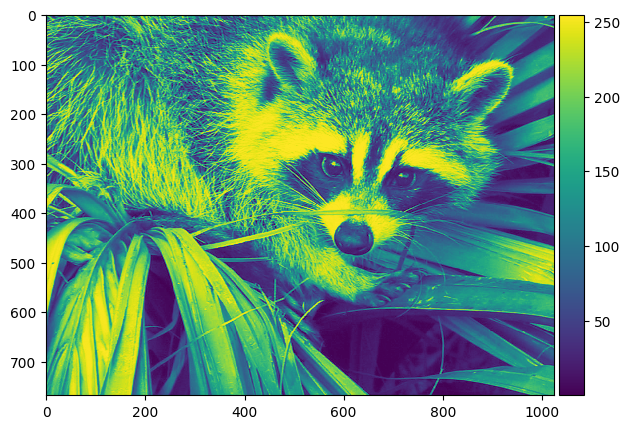

In [32]:
#szop_orig255=szop_orig*255
#szop_kont255=szop_kont*255
szop_kont255h=exposure.equalize_hist(szop_kont)*255
io.imshow(szop_kont255h)

Text(0, 0.5, 'Liczba pikseli')

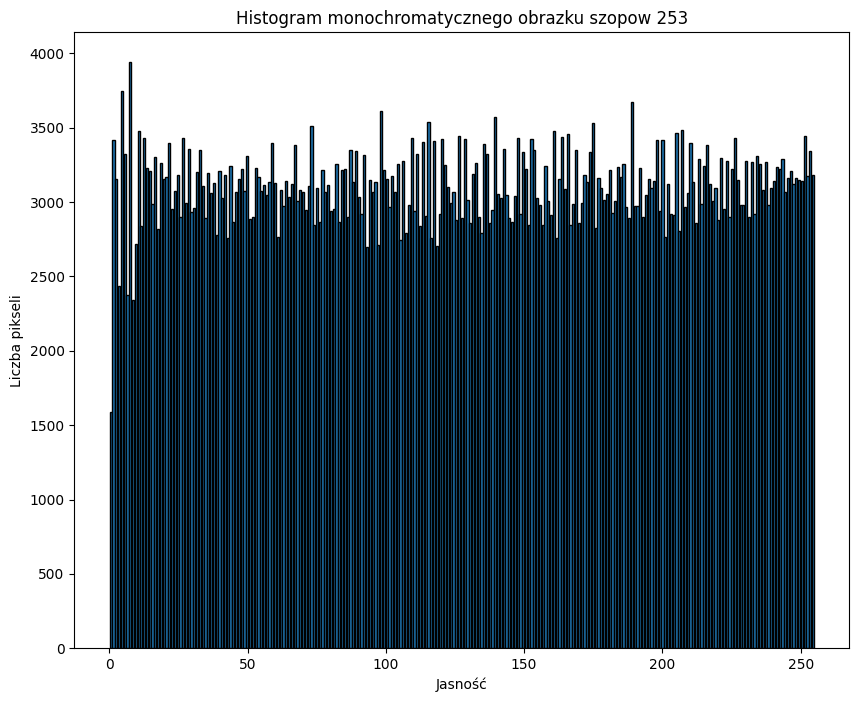

In [31]:

hist_kh , bins_kh=exposure.histogram(szop_kont255h, nbins=253)
plt.figure(figsize=(10,8))
plt.bar(bins_kh,hist_kh, edgecolor = k)
plt.title('Histogram monochromatycznego obrazku szopow 253')
plt.xlabel('Jasność')
plt.ylabel('Liczba pikseli')

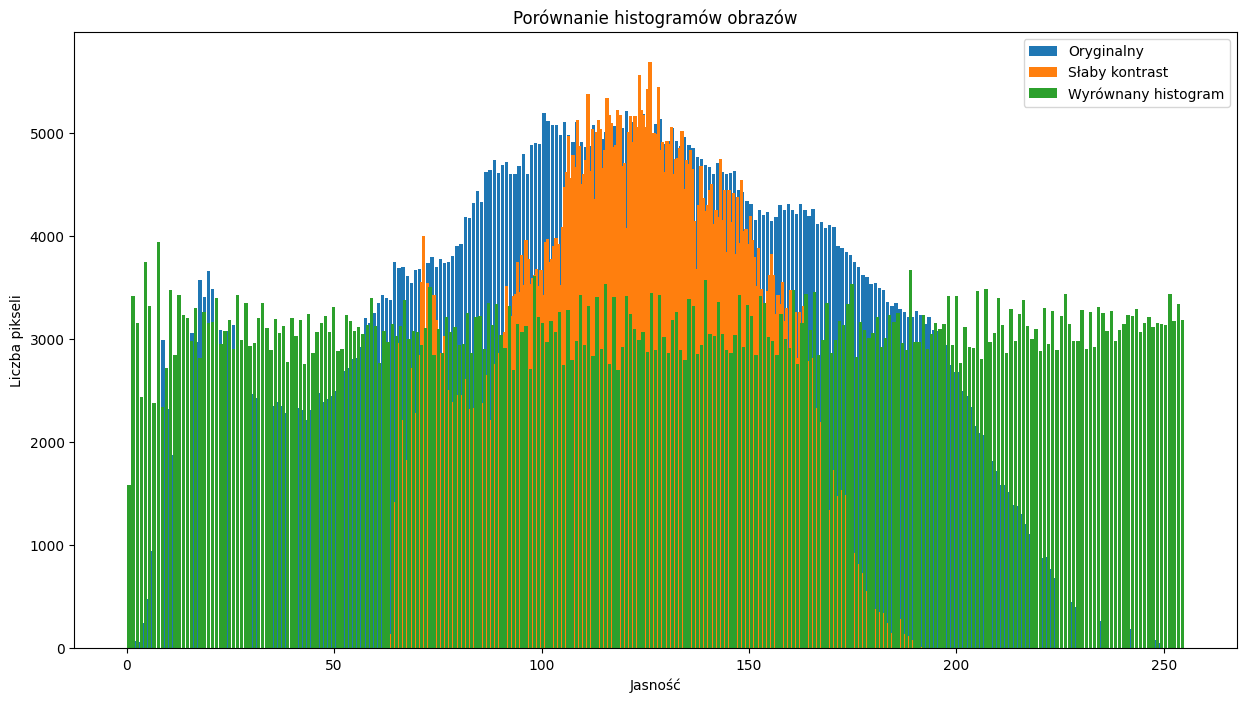

In [17]:
racoons = {
    "Oryginalny obraz": szop_orig255,
    "Obraz ze słabym kontrastem": szop_kont255,
    "Obraz z wyrównanym histogramem": szop_kont255h
}

plt.figure(figsize=(15, 8))
for label, obrazek in racoons.items():
    histogram, bin_edges = exposure.histogram(obrazek, nbins=253)
    plt.bar(bin_edges, histogram, label=label)

plt.title('Porównanie histogramów obrazów')
plt.xlabel('Jasność')
plt.ylabel('Liczba pikseli')
plt.legend(['Oryginalny', 'Słaby kontrast', 'Wyrównany histogram'])

Pytanie 6

Histogram obrazu ze słabym kontrastem jest zawężony – wartości jasności są skupione w wąskim zakresie. 
Po wyrównaniu histogram jest rozciągnięty na cały zakres jasności (zwiększono kontrast). Wyrównanie zwiększa kontrast lokalny, ale nie odtwarza dokładnie struktury oryginalnego histogramu.

Pytanie 7

każda jasność jest przeliczana z użyciem nieliniowej funkcji kumulatywnej, a nie prostej kombinacji liniowej, stąd wyrównanie histogramu – operacja nieliniowa.

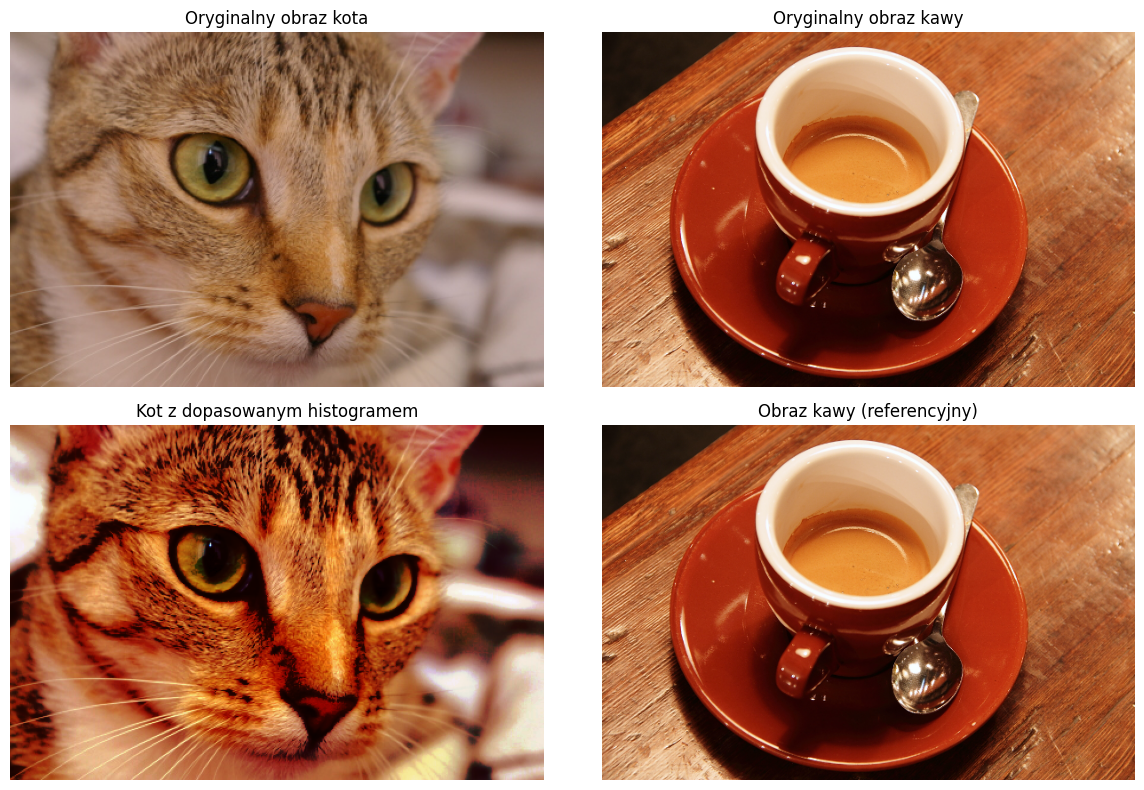

In [18]:
kawa = data.coffee()
kot = data.chelsea()

kawa_kot=exposure.match_histograms(kot,kawa, channel_axis=-1)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(kot)
axes[0, 0].set_title("Oryginalny obraz kota")
axes[0, 0].axis("off")

axes[0, 1].imshow(kawa)
axes[0, 1].set_title("Oryginalny obraz kawy")
axes[0, 1].axis("off")

axes[1, 0].imshow(kawa_kot)
axes[1, 0].set_title("Kot z dopasowanym histogramem")
axes[1, 0].axis("off")

axes[1, 1].imshow(kawa)
axes[1, 1].set_title("Obraz kawy (referencyjny)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Kanał Niebieski')

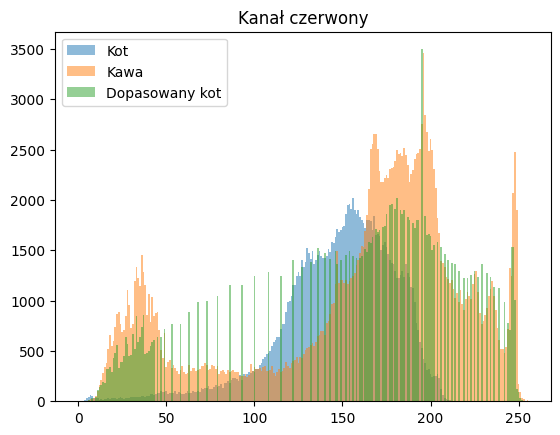

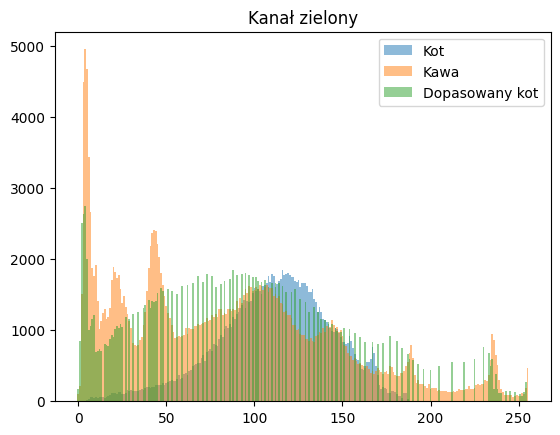

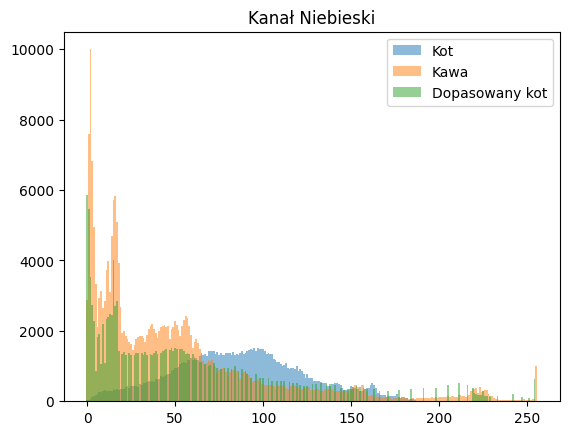

In [19]:
# kanał R
his_kot_r, bins_kot_r = exposure.histogram(kot[:,:,0], nbins=256)
his_kawa_r, bins_kawa_r = exposure.histogram(kawa[:,:,0], nbins=256)
his_dop_r, bins_dop_r = exposure.histogram(kawa_kot[:,:,0], nbins=256)
# kanał G
his_kot_g, bins_kot_g = exposure.histogram(kot[:,:,1], nbins=256)
his_kawa_g, bins_kawa_g = exposure.histogram(kawa[:,:,1], nbins=256)
his_dop_g, bins_dop_g = exposure.histogram(kawa_kot[:,:,1], nbins=256)
# kanał B
his_kot_b, bins_kot_b = exposure.histogram(kot[:,:,2], nbins=256)
his_kawa_b, bins_kawa_b = exposure.histogram(kawa[:,:,2], nbins=256)
his_dop_b, bins_dop_b = exposure.histogram(kawa_kot[:,:,2], nbins=256)

plt.figure()
plt.bar(bins_kot_r, his_kot_r, width = 1, alpha=0.5)
plt.bar(bins_kawa_r, his_kawa_r, width = 1, alpha=0.5)
plt.bar(bins_dop_r, his_dop_r, width = 1, alpha=0.5)
plt.legend(['Kot', 'Kawa', 'Dopasowany kot'])
plt.title('Kanał czerwony')

plt.figure()
plt.bar(bins_kot_g, his_kot_g, width = 1, alpha=0.5)
plt.bar(bins_kawa_g, his_kawa_g, width = 1, alpha=0.5)
plt.bar(bins_dop_g, his_dop_g, width = 1, alpha=0.5)
plt.legend(['Kot', 'Kawa', 'Dopasowany kot'])
plt.title('Kanał zielony')

plt.figure()
plt.bar(bins_kot_b, his_kot_b, width = 1, alpha=0.5)
plt.bar(bins_kawa_b, his_kawa_b, width = 1, alpha=0.5)
plt.bar(bins_dop_b, his_dop_b, width = 1, alpha=0.5)
plt.legend(['Kot', 'Kawa', 'Dopasowany kot'])
plt.title('Kanał Niebieski')

Pytanie 8

Kanał czerwony - histogram rozciągnął się, a obszar gdzie wartości były najbardziej zgrupowane został przesunięty w prawo, dopasowywując się do obrazu referencyjnego.

Kanał zielony - histogram został rozciągnięty. Na dodatek przy niskich poziomach jasności pojawiła się górka podobna do tej w obrazie referencyjnym.

Kanał niebieski - wartości jasności przesuneły się w kierunku niskich poziomów jasności, podobnie jak w przypadku kanału zielonego.

Pytanie 9

Wyrównanie histogramu – przekształca histogram tak, aby był równomierny, zwiększa kontrast, działa bez względu na wzorzec. Dopasowanie histogramów – modyfikuje obraz tak, aby jego histogram był jak najbardziej podobny do histogramu obrazu wzorcowego, zmienia nie tylko kontrast ale też kolory.

C:\Users\ALIAK\AppData\Local\Temp\ipykernel_25756\3852682729.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(szop_match255)
e:\Laboratoria\VENVS\dip_venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


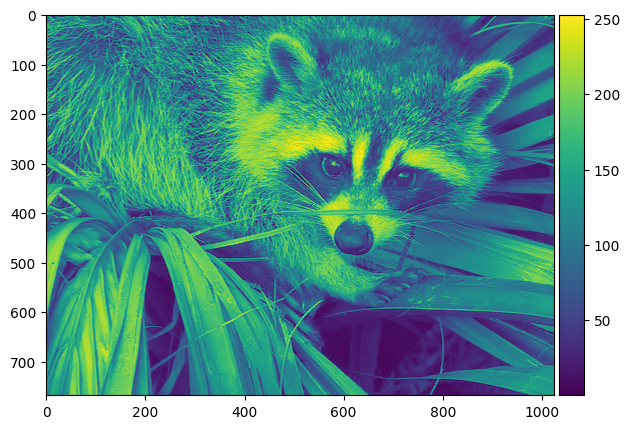

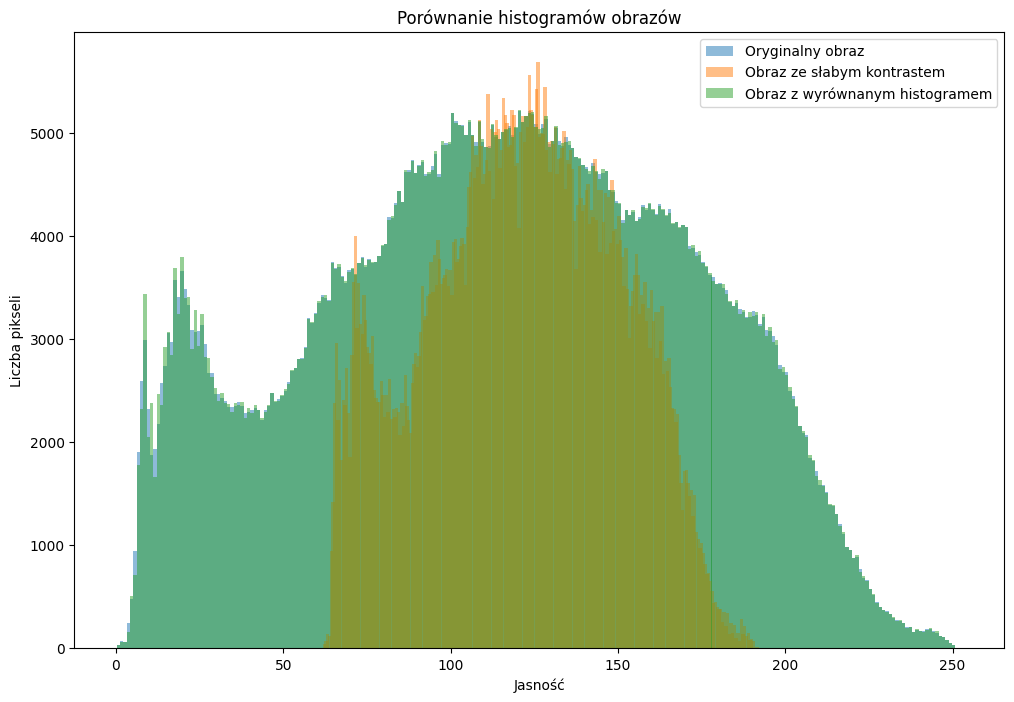

In [33]:
szop_match255 = exposure.match_histograms(szop_kont255, szop_orig255, channel_axis=-1)
io.imshow(szop_match255)
racoons = {
    "Oryginalny obraz": szop_orig255,
    "Obraz ze słabym kontrastem": szop_kont255,
    "Obraz z wyrównanym histogramem": szop_match255
}

plt.figure(figsize=(12, 8))
for label, obrazek in racoons.items():
    histogram, bin_edges = exposure.histogram(obrazek, nbins=253)
    plt.bar(bin_edges, histogram, label=label, width = 1, alpha=0.5)

plt.title('Porównanie histogramów obrazów')
plt.xlabel('Jasność')
plt.ylabel('Liczba pikseli')
plt.legend()

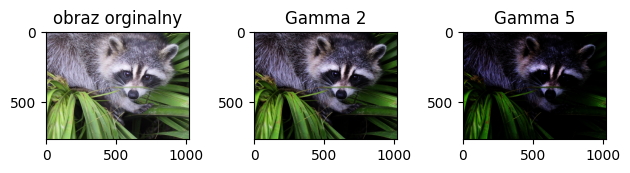

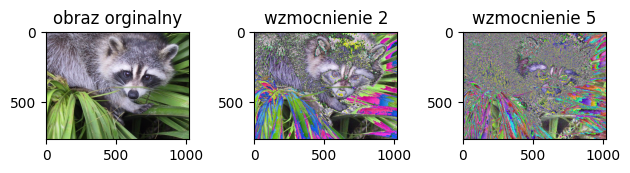

In [21]:
szop=io.imread('raccoon.png')
gamma2 = exposure.adjust_gamma(szop, 2)
gamma5 = exposure.adjust_gamma(szop, 5)

plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(szop)
plt.title('obraz orginalny')

plt.subplot(1, 3, 2)
plt.imshow(gamma2)
plt.title('Gamma 2')

plt.subplot(1, 3, 3)
plt.imshow(gamma5)
plt.title('Gamma 5')

plt.tight_layout()

log2 = exposure.adjust_log(szop, 2)
log5 = exposure.adjust_log(szop, 5)

plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(szop)
plt.title('obraz orginalny')

plt.subplot(1, 3, 2)
plt.imshow(log2)
plt.title('wzmocnienie 2')

plt.subplot(1, 3, 3)
plt.imshow(log5)
plt.title('wzmocnienie 5')

plt.tight_layout()

Pytanie 10 

Wraz z zwiększającą się gammą zmniejsza się jasność obrazu ale zwiększa się kontrast.

Pytanie 11

Histogram kumulatywny pokazuje skumulowaną sumę częstości występowania wartości jasności. Zwykły histogram pokazuje częstość jasności, zaś histogram kumulatywny pokazuje narastający udział pikseli.